In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [2]:
data = open("data.txt", encoding="utf-8")

In [3]:
texts = data.readlines()
# texts

In [4]:
# data = list(map(lambda x: re.split(", | - |: ", x)))
texts = list(map(lambda x: x.strip("\n"), texts))
# texts

In [5]:
data = list(map(lambda x: re.split(", | - |: ", x), texts))
# data

In [6]:
data = list(map(lambda x: [" ".join(x[:2])] + x[2:], data))
# data

In [7]:
cols = ["DateTime", "SentBy", "Message"]

In [8]:
df = pd.DataFrame(data)

In [12]:
df = df.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,09/12/18 9:50 pm,Aaditya Verma,She had landed,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,09/12/18 9:50 pm,Aaditya Verma,Has,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,09/12/18 9:50 pm,Aaditya Verma,*,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
35,09/12/18 9:58 pm,Sweta Sahu,Hhahahaa is it thanks,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
36,09/12/18 9:58 pm,Sweta Sahu,I feelll a lil better,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [13]:
df.drop([i for i in range(3, 35)], axis=1, inplace=True)

In [14]:
df.columns = cols

In [15]:
df.head(10)

,DateTime,SentBy,Message
0,09/12/18 9:50 pm,Aaditya Verma,She had landed
1,09/12/18 9:50 pm,Aaditya Verma,Has
2,09/12/18 9:50 pm,Aaditya Verma,*
35,09/12/18 9:58 pm,Sweta Sahu,Hhahahaa is it thanks
36,09/12/18 9:58 pm,Sweta Sahu,I feelll a lil better
37,09/12/18 9:58 pm,Sweta Sahu,Heaeing this
38,09/12/18 9:58 pm,Aaditya Verma,And
39,09/12/18 9:58 pm,Aaditya Verma,Body bhi thikane laga di
40,09/12/18 9:58 pm,Aaditya Verma,So don't worry
41,09/12/18 9:58 pm,Aaditya Verma,🤭🤭🤭


In [16]:
df = df[df["DateTime"].apply(lambda x: len(x) < 17)]

In [17]:
df = df[df["DateTime"].apply(lambda x: "/" in x)]

In [18]:
df["DateTime"] = pd.to_datetime(df["DateTime"])

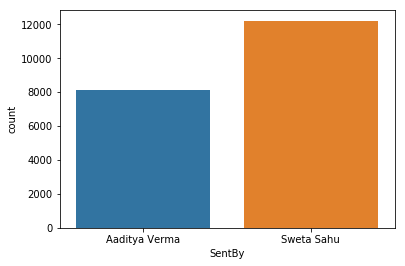

In [19]:
sns.countplot(df["SentBy"])

In [20]:
df[df["Message"].apply(lambda x: "🤣" in x)].count()

DateTime    335
SentBy      335
Message     335
dtype: int64

In [21]:
df.head()

,DateTime,SentBy,Message
0,2018-09-12 21:50:00,Aaditya Verma,She had landed
1,2018-09-12 21:50:00,Aaditya Verma,Has
2,2018-09-12 21:50:00,Aaditya Verma,*
35,2018-09-12 21:58:00,Sweta Sahu,Hhahahaa is it thanks
36,2018-09-12 21:58:00,Sweta Sahu,I feelll a lil better


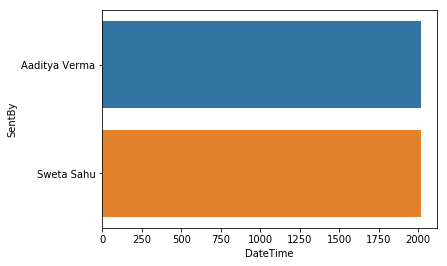

In [23]:
sns.barplot(df["DateTime"].dt.year, df["SentBy"])

In [27]:
df.plot.line("DateTime")

TypeError: Empty 'DataFrame': no numeric data to plot